In [6]:

# Any data point/observation that deviates significantly from the other observations is called an Anomaly/Outlier.
# The approach employs binary trees to detect anomalies, resulting in a linear time complexity and low memory 
# usage that is well-suited for processing large datasets.
# Since its introduction, Isolation Forest has gained popularity as a fast and reliable algorithm for 
# anomaly detection in various fields such as cybersecurity, finance, and medical research.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr
from sklearn import datasets
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df = df.reset_index()
print(df.columns)
df.head()


Index(['index', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')


,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


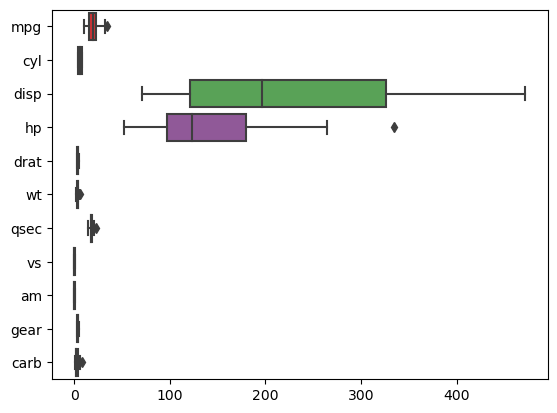

In [7]:

df_new = df[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']]
ax = sns.boxplot(data=df_new, orient="h", palette="Set1")


In [8]:

anomaly_inputs = ['disp', 'hp']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])


IsolationForest(contamination=0.1, random_state=42)

In [10]:

# After fitting the model, as done directely above, we can add two new columns to our dataframe
# The first line below provides the anomaly score for each sample within the dataset. 
# The lower the score, the more abnormal that sample is. Negative values indicate that the sample is an outlier.

df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])

# Generated by calling upon model_IF.predict() and is used to identify if a point is an outlier (-1) or an inlier (1).
df['anomaly'] = model_IF.predict(df[anomaly_inputs])


In [11]:

# Once the anomalies have been identified, we can view our dataframe and see the result.
df.loc[:, ['disp', 'hp','anomaly_scores','anomaly']]


,disp,hp,anomaly_scores,anomaly
0,160.0,110,0.147964,1
1,160.0,110,0.147964,1
2,108.0,93,0.103515,1
3,258.0,110,0.072653,1
4,360.0,175,0.102172,1
5,225.0,105,0.071347,1
6,360.0,245,0.068003,1
7,146.7,62,0.049935,1
8,140.8,95,0.129923,1
9,167.6,123,0.118027,1


In [12]:

import plotly.express as px
fig = px.scatter(df, x="disp", y="hp", color="hp", hover_name='index')
fig.show()


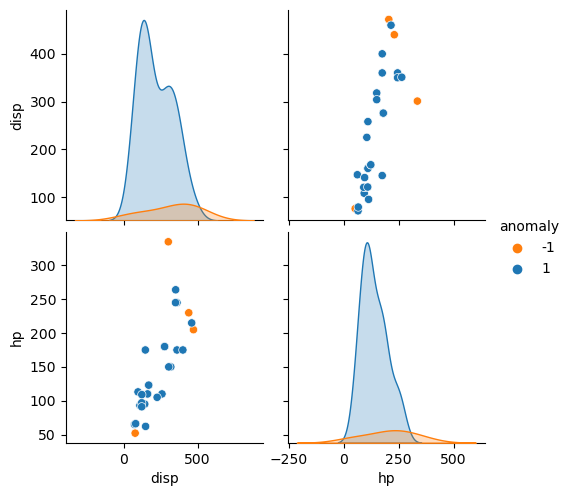

In [14]:

# Seaborn pairplot will allow us to visualize all variables, relative to all other variables, simultaneously.
# First, we need to set the palette, which will allow us to control the colours being used in the plot.
# Then, we can call upon sns.pairplot and pass in the required parameters for our 'anomaly_inputs'.

palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)


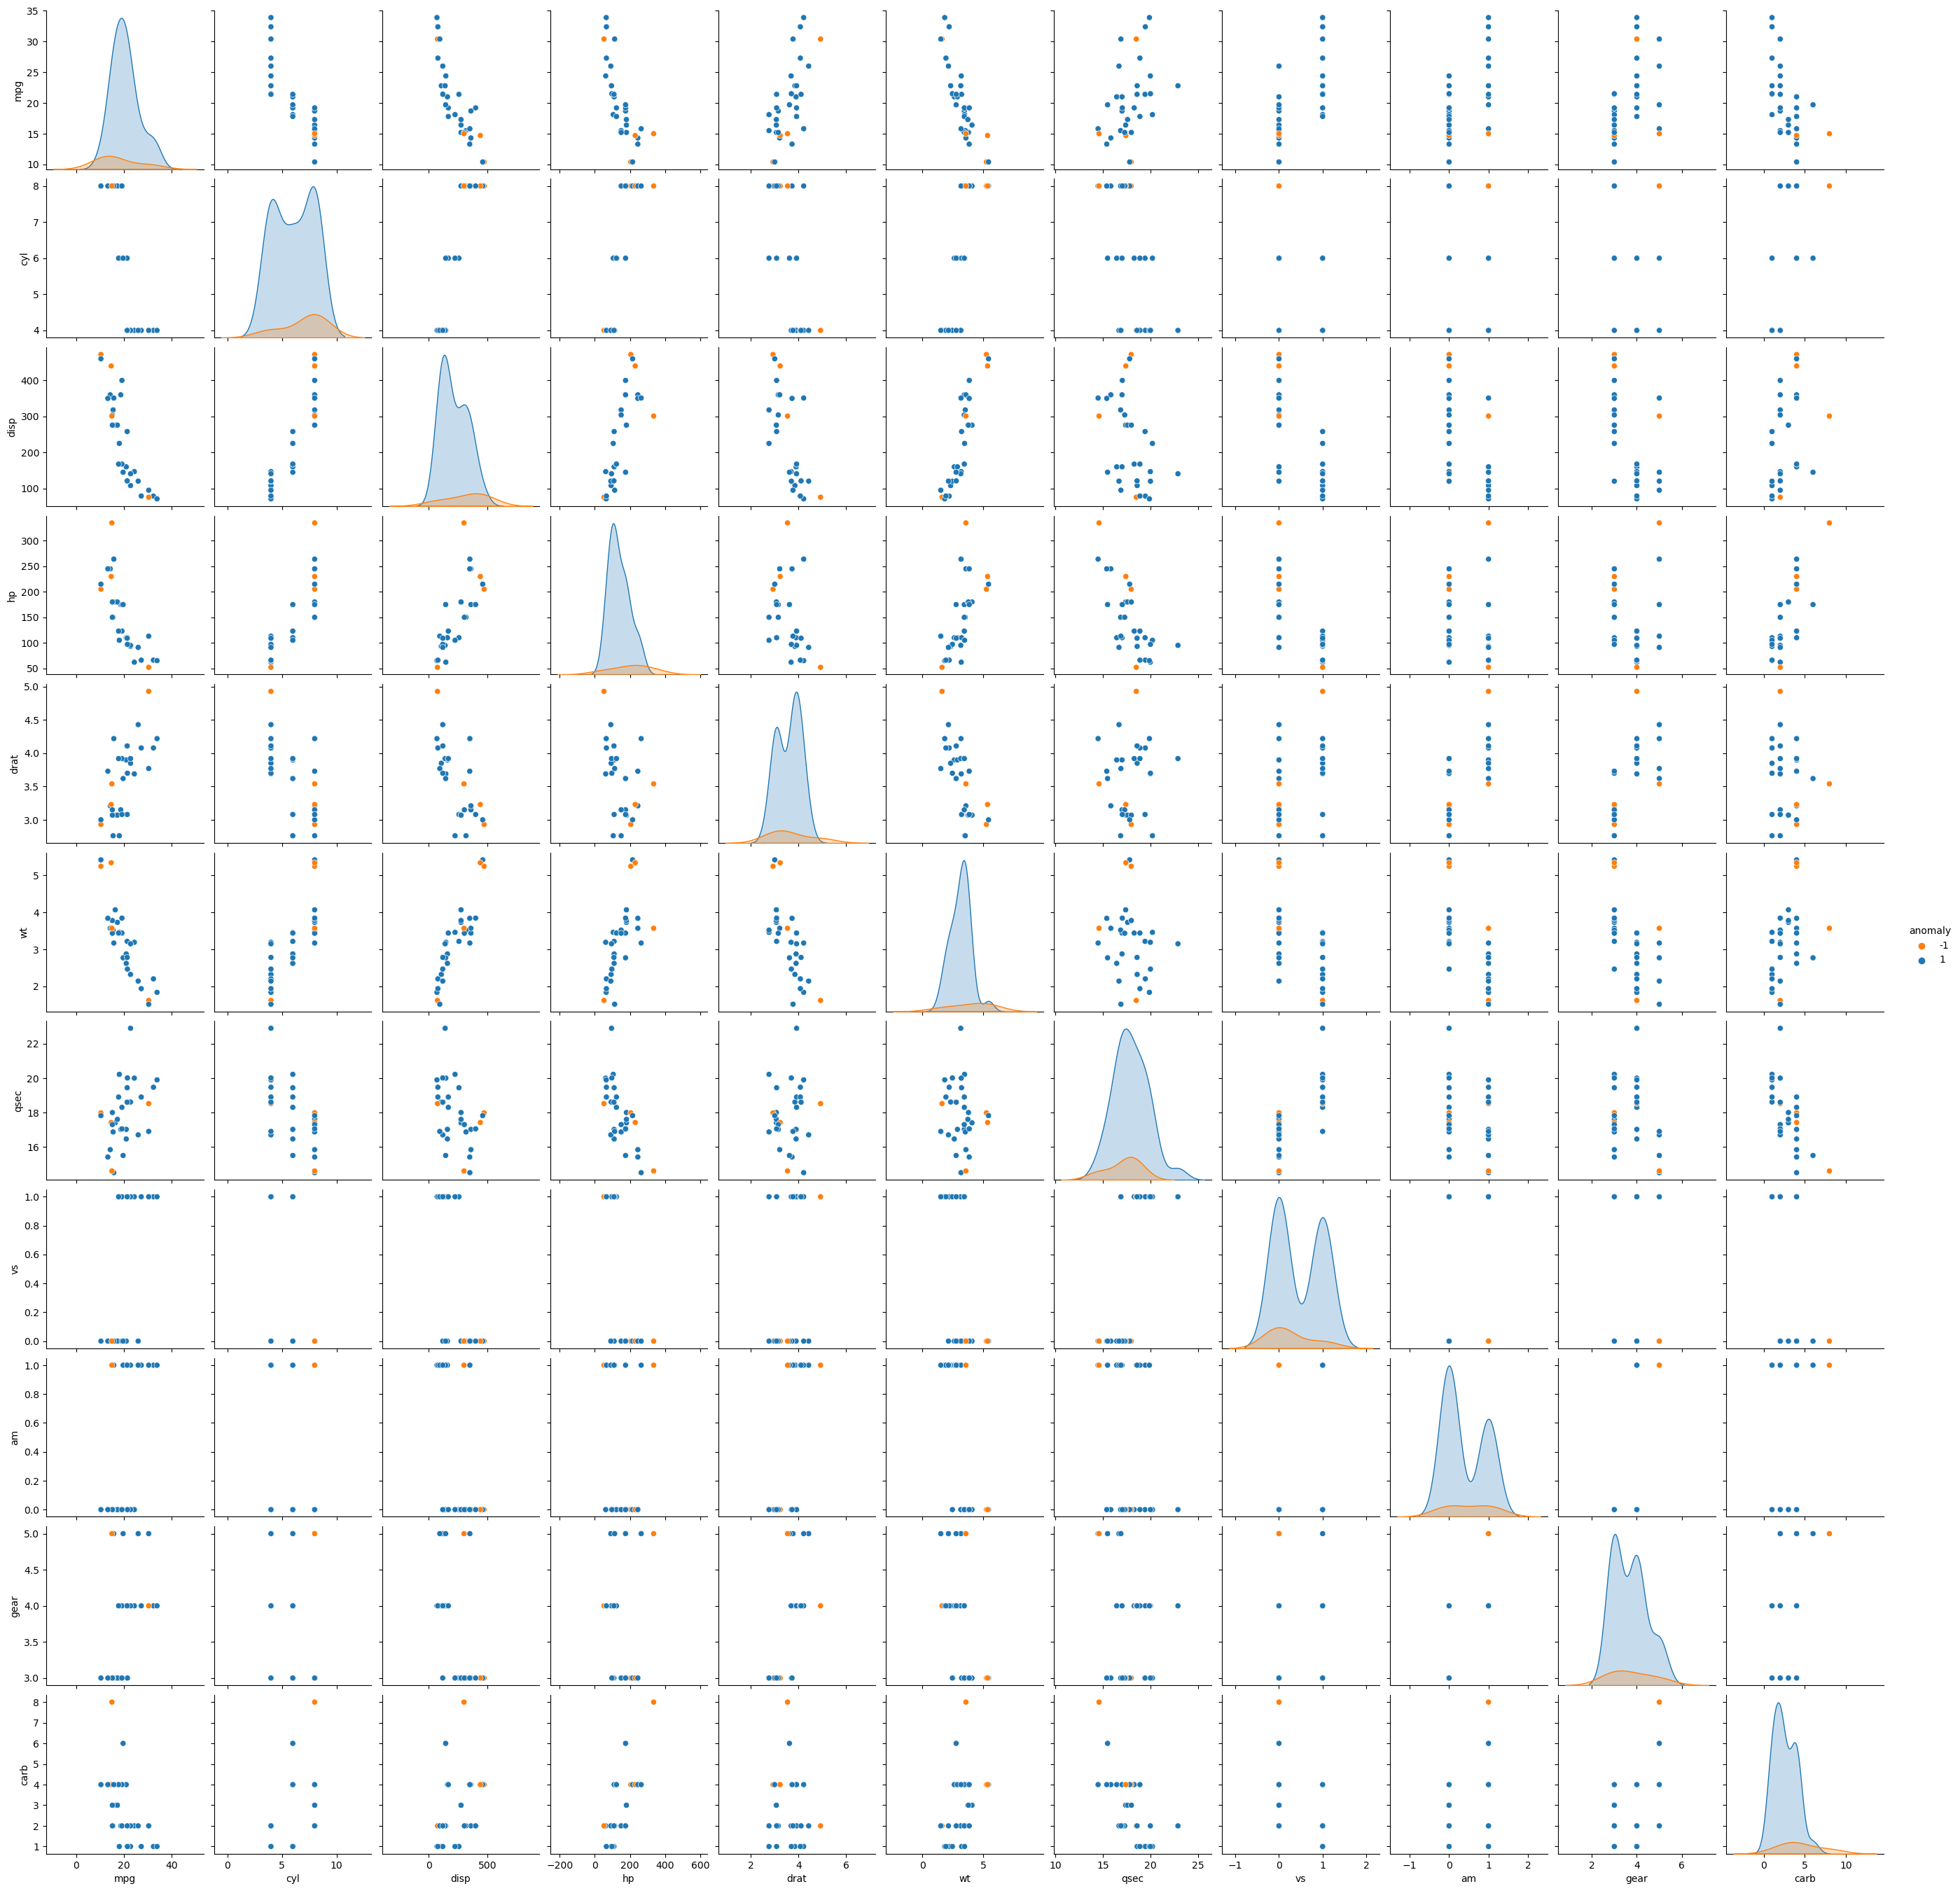

In [15]:

palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], hue='anomaly', palette=palette)
